In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.integrate import trapezoid

### Reading excel files

In [82]:
# Function that reads an exelfile and returns displacement and force

def ForceAndDisp_FromExcel(filename, sheetname):
    Data = pd.read_excel(filename, sheet_name=sheetname)

    disp = np.array(Data['Displacement (mm)'])
    force = np.array(Data['Force (kN)'])

    return force, disp

In [83]:
# Function that plots two arrays

def plot_2_arrays(xValues, yValues, xLabel, yLabel, title):
    plt.figure(figsize=(10,6))
    plt.plot(xValues, yValues)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.title(title)
    plt.grid()
    plt.show()

In [84]:
# Function that locates necking

In [5]:
# Function that returns true stress and true strain 

In [6]:
# Function that returns engineering stress and engineering strain 

# Preliminary tests 

### Split hopkinson pressure bar

Specimen Data:

    Shape: Circular
    Length: 11.00 mm
    Diameter: 10.00 mm
    Thickness: n/a
    E-Module: 100 MPa
    Temperature: 23  °C
    
    Total time: 2.4995 (DETTE VARIERER KANSKJE???)
    pix to mm ratio: 21.7769

In [87]:
# Given constants 
E = 100    #[MPa]
D0 = 10    #[mm]
A0 = 1/4*D0**2*np.pi #[mm**2]

In [88]:
# Find dt from DIC
# UC_SHPB_1:
dt_DIC = (25.12647429-25.12647096)*1000   #(time_photo_3 - time_photo_2)*1000 = 0.00333 [ms]

# Find dt from machine
dt_machine = 0.000500

# Match time from DIC to machine



In [89]:
def DispAndTime_FromExcel(fileName, sheetName, dt):
    pix_mm_ratio = 21.7769

    # Importing data 
    data = pd.read_excel(fileName, sheetName)
    disp_pix = np.array(data['Displacement (pix)'])

    # Converting displacement from pix to mm 
    disp = (disp_pix-disp_pix[0])/pix_mm_ratio

    total_time = dt*(len(disp)-1)
    time = np.linspace(0,total_time,len(disp))

    return disp, time


In [90]:
def TimeAndStrain_fromExcel(fileName, sheetName):

    # Importing data 
    data = pd.read_excel(fileName, sheetName)
    SG_2_2 = np.array(data['SG #2_2  [µS]'])
    time = np.array(data['Time [ms]'])

    return SG_2_2, time



In [116]:
def StrainToForce(eps, E, A): #Eps i microS (*10^-6) -> Force i N?
    sigma = eps*(10**(-6))*E 
    F = sigma*A
    return F

In [117]:
def ExpandArray(original_array, new_size):
    original_indices = np.linspace(0, 1, len(original_array))
    new_indices = np.linspace(0, 1, new_size)

    # Interpolate to find the new array
    expanded_array = np.interp(new_indices, original_indices, original_array)

    return expanded_array

In [118]:
def find_t0_index(list,threshold):
    #threshold = np.std(list[:50]) * 6  # 2x standard deviation av initielle målinger
    # Første index hvor verdiene overstiger threshold
    t0_index = np.where(np.abs(list) >= threshold)[0][0]
    return t0_index


##### UC_SHPB_1
Velocity:  3.85m/s

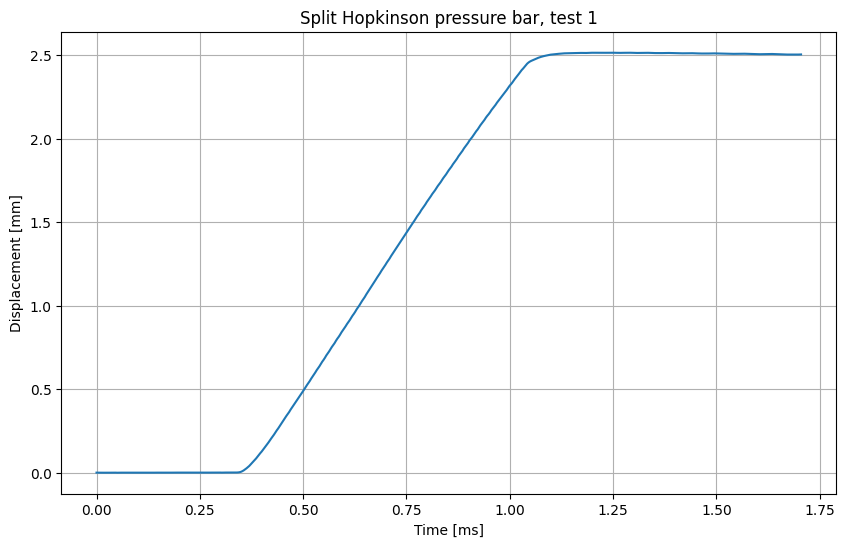

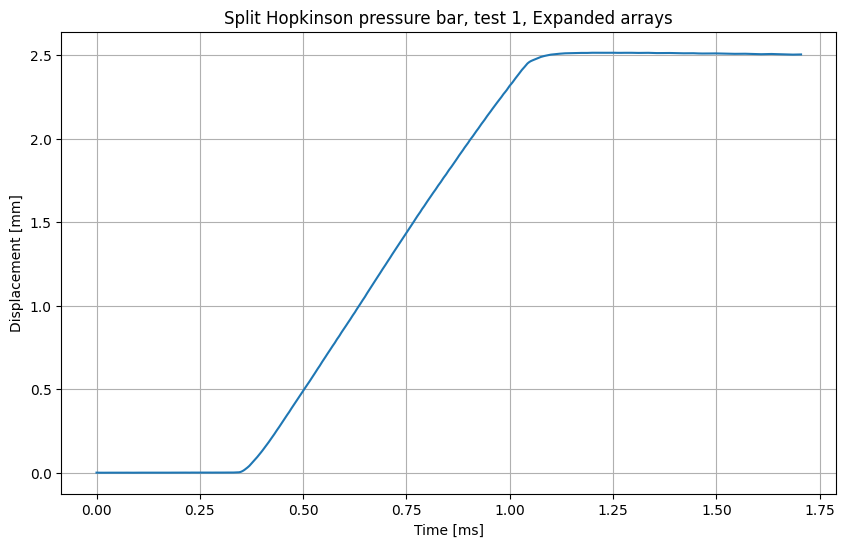

In [119]:
# DIC
# Displacement and time 
disp_UC_SHPB_1_temp,time_UC_SHPB_1_temp = DispAndTime_FromExcel('Preliminary_tests_data.xlsx', 'UC_SHPB1', dt_DIC)

# Expanding array with linear interpolation 
disp_UC_SHPB_1 = ExpandArray(disp_UC_SHPB_1_temp, round(len(disp_UC_SHPB_1_temp)/dt_machine*dt_DIC))
time_UC_SHPB_1 = ExpandArray(time_UC_SHPB_1_temp, round(len(disp_UC_SHPB_1_temp)/dt_machine*dt_DIC))



# Plot displacement vs time
plot_2_arrays(time_UC_SHPB_1_temp, disp_UC_SHPB_1_temp, 'Time [ms]', 'Displacement [mm]', 'Split Hopkinson pressure bar, test 1')
plot_2_arrays(time_UC_SHPB_1, disp_UC_SHPB_1, 'Time [ms]', 'Displacement [mm]', 'Split Hopkinson pressure bar, test 1, Expanded arrays')

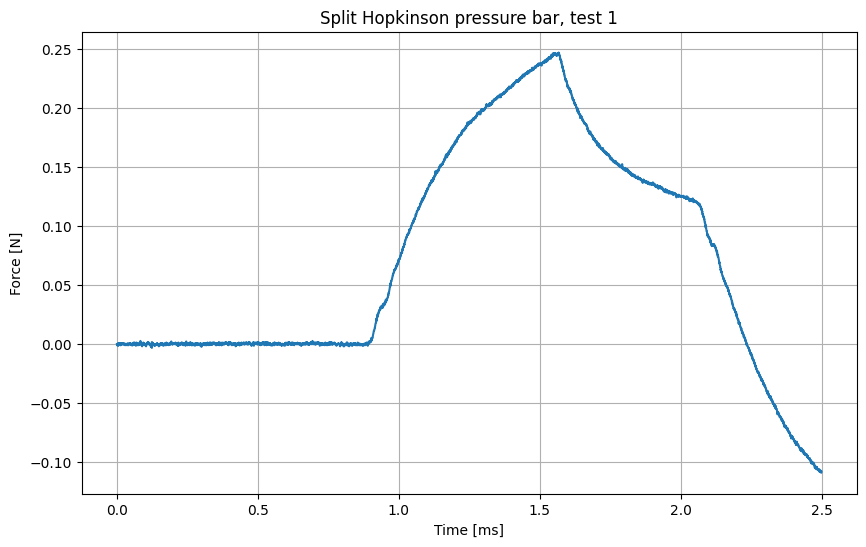

In [120]:
#Machine data 
SG_2_2_SH_1, time_machine_SH_1 = TimeAndStrain_fromExcel('Preliminary_tests_data.xlsx', 'UC_SHPB1')

#Convert strain to force
temp_force = StrainToForce(SG_2_2_SH_1, E, A0)

F_SH_1 = temp_force - np.mean(temp_force[0:100])

plot_2_arrays(time_machine_SH_1, F_SH_1, 'Time [ms]', 'Force [N]', 'Split Hopkinson pressure bar, test 1')


In [130]:

print(time_UC_SHPB_1[1]-time_UC_SHPB_1[0])
print(time_machine_SH_1[1]-time_machine_SH_1[0])

print(len(time_UC_SHPB_1))
print(len(time_machine_SH_1))

0.0004999150127580541
0.0005
33300
5000


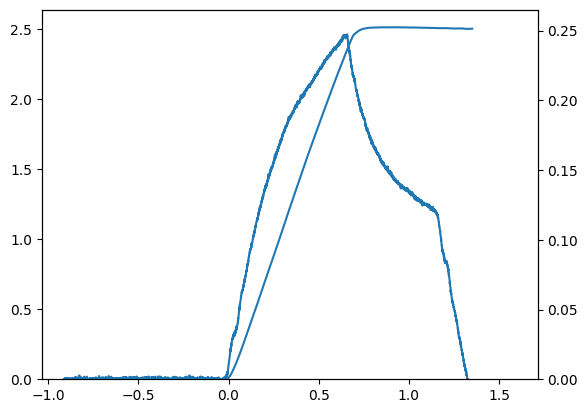

In [148]:
# Matching DIC to machine measurements 

# Finn tidspunkt dt mellom start på DIC måling og start på machine måling
t0_DIC_index = find_t0_index(disp_UC_SHPB_1, 0.01)
t0_machine_index = find_t0_index(F_SH_1,0.01)

t_0_SHPB = time_UC_SHPB_1[t0_DIC_index]
t_0_machine = time_machine_SH_1[t0_machine_index]

plt.plot(time_UC_SHPB_1-t_0_SHPB, disp_UC_SHPB_1)
plt.ylim(0)
plt.twinx()
plt.plot(time_machine_SH_1-t_0_machine, F_SH_1)
plt.ylim(0)
plt.show()


F_machine = F_SH_1[t0_machine_index:(len(F_SH_1)-t0_DIC_index)]
disp_DIC = disp_UC_SHPB_1[t0_DIC_index:(len(F_SH_1)-t0_machine_index)]


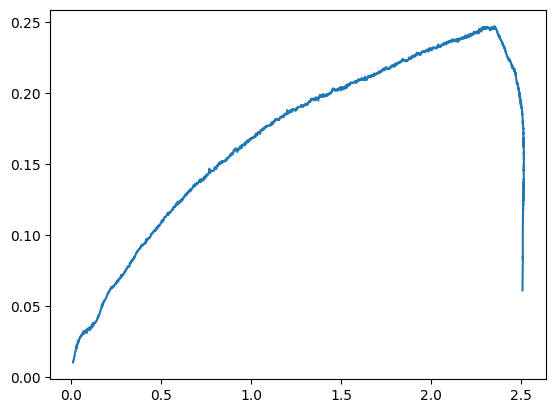

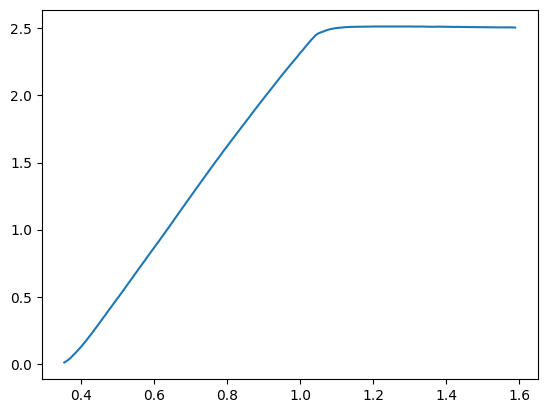

In [147]:
# Matching t0 for DIC and machine data

F_machine = F_SH_1[t0_machine_index:(len(F_SH_1)-t0_DIC_index)]
disp_DIC = disp_UC_SHPB_1[t0_DIC_index:(len(F_SH_1)-t0_machine_index)]

plt.plot(disp_DIC, F_machine)
plt.xlabel('Displacement [mm]')
plt.ylabel('')
plt.show()

##### UC_SHPB_2
Velocity:  9.54m/s

In [98]:
# Displacement and time 
disp_UC_SHPB_2, time_UC_SHPB_2 = DispAndTime_FromExcel('Preliminary_tests_data.xlsx', 'UC_SHPB2', dt_DIC)

# Plot displacement vs time
#plot_2_arrays(time_UC_SHPB_2, disp_UC_SHPB_2, 'Time [ms]', 'Displacement [mm]', 'Split Hopkinson pressure bar')


##### UC_SHPB_3

Velocity:  7.80m/s

In [99]:
# Displacement and time 
disp_UC_SHPB_3, time_UC_SHPB_3 = DispAndTime_FromExcel('Preliminary_tests_data.xlsx', 'UC_SHPB3', dt_DIC)

##### UC_SHPB_4
Velocity:  4.29m/s

In [100]:
# Displacement and time 
disp_UC_SHPB_4, time_UC_SHPB_4 = DispAndTime_FromExcel('Preliminary_tests_data.xlsx', 'UC_SHPB4', dt_DIC)


##### Plot of all tests

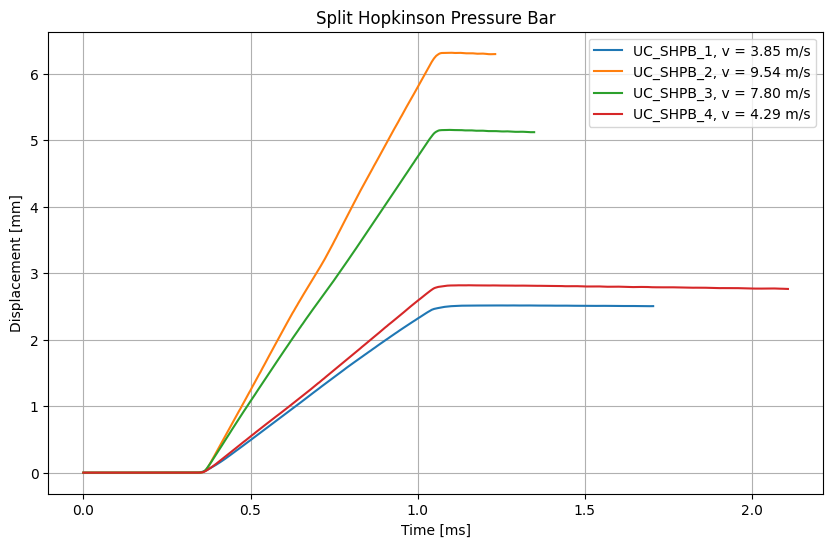

In [101]:
plt.figure(figsize=(10,6))
plt.plot(time_UC_SHPB_1, disp_UC_SHPB_1, label = 'UC_SHPB_1, v = 3.85 m/s')
plt.plot(time_UC_SHPB_2, disp_UC_SHPB_2, label = 'UC_SHPB_2, v = 9.54 m/s')
plt.plot(time_UC_SHPB_3, disp_UC_SHPB_3, label = 'UC_SHPB_3, v = 7.80 m/s')
plt.plot(time_UC_SHPB_4, disp_UC_SHPB_4, label = 'UC_SHPB_4, v = 4.29 m/s')
plt.xlabel('Time [ms]')
plt.ylabel('Displacement [mm]')
plt.title('Split Hopkinson Pressure Bar')
plt.legend()
plt.grid()
plt.show()

### Uniaxial tension

In [102]:
force_UT_1, disp_UT_1 = ForceAndDisp_FromExcel('Preliminary_tests_data.xlsx', 'UT_1')
force_UT_2, disp_UT_2 = ForceAndDisp_FromExcel('Preliminary_tests_data.xlsx', 'UT_2')
force_UT_3, disp_UT_3 = ForceAndDisp_FromExcel('Preliminary_tests_data.xlsx', 'UT_3')
force_UT_4, disp_UT_4 = ForceAndDisp_FromExcel('Preliminary_tests_data.xlsx', 'UT_4')

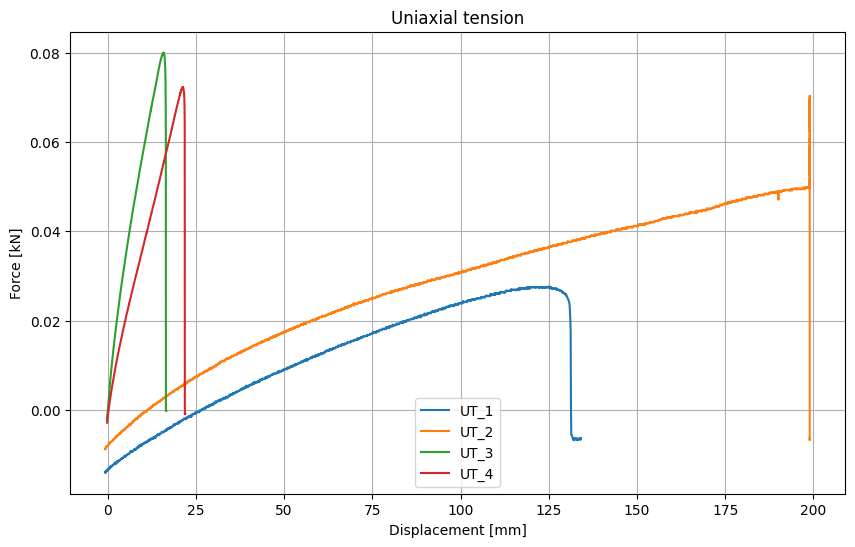

In [103]:
plt.figure(figsize=(10,6))
plt.plot(disp_UT_1, force_UT_1, label = 'UT_1')
plt.plot(disp_UT_2, force_UT_2, label = 'UT_2')
plt.plot(disp_UT_3, force_UT_3, label = 'UT_3')
plt.plot(disp_UT_4, force_UT_4, label = 'UT_4')
plt.xlabel('Displacement [mm]')
plt.ylabel('Force [kN]')
plt.title('Uniaxial tension')
plt.legend()
plt.grid()
plt.show()

### Uniaxial Compression 

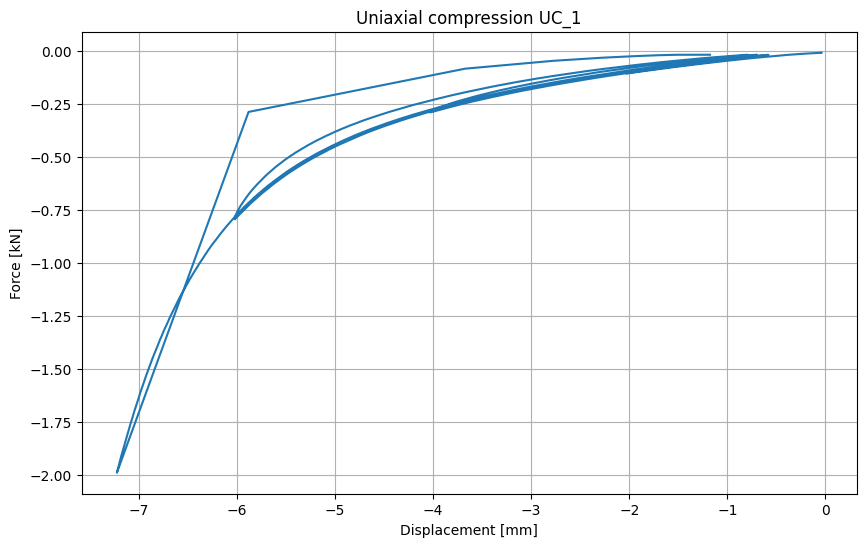

In [104]:
force_UC_1, disp_UC_1 = ForceAndDisp_FromExcel('Preliminary_tests_data.xlsx', 'UC_1')

plot_2_arrays(disp_UC_1, force_UC_1, 'Displacement [mm]', 'Force [kN]', 'Uniaxial compression UC_1')

In [105]:
force_UC_2, disp_UC_2 = ForceAndDisp_FromExcel('Preliminary_tests_data.xlsx', 'UC_2')
force_UC_3, disp_UC_3 = ForceAndDisp_FromExcel('Preliminary_tests_data.xlsx', 'UC_3')
force_UC_4, disp_UC_4 = ForceAndDisp_FromExcel('Preliminary_tests_data.xlsx', 'UC_4')
force_UC_5, disp_UC_5 = ForceAndDisp_FromExcel('Preliminary_tests_data.xlsx', 'UC_5')
force_UC_6, disp_UC_6 = ForceAndDisp_FromExcel('Preliminary_tests_data.xlsx', 'UC_6')
force_UC_7, disp_UC_7 = ForceAndDisp_FromExcel('Preliminary_tests_data.xlsx', 'UC_7')
force_UC_8, disp_UC_8 = ForceAndDisp_FromExcel('Preliminary_tests_data.xlsx', 'UC_8')
force_UC_9, disp_UC_9 = ForceAndDisp_FromExcel('Preliminary_tests_data.xlsx', 'UC_9')


##### Plot

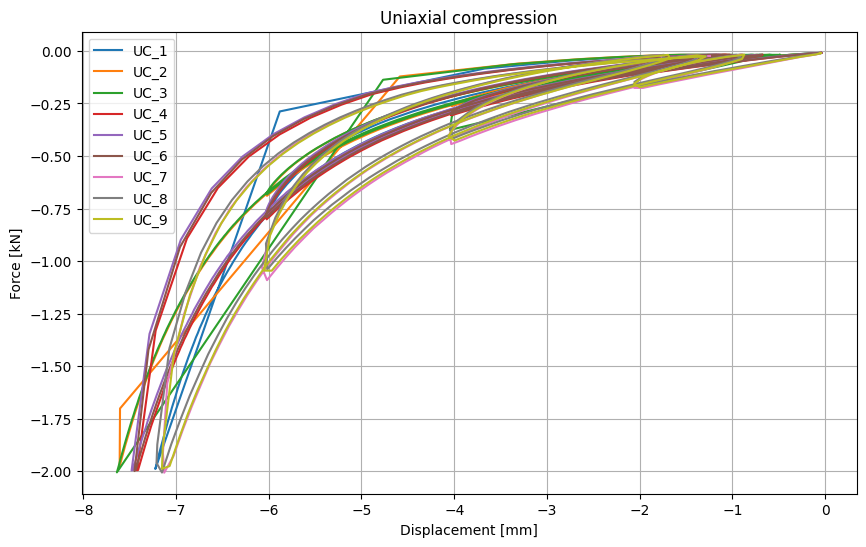

In [106]:
plt.figure(figsize=(10,6))
plt.plot(disp_UC_1, force_UC_1, label = 'UC_1')
plt.plot(disp_UC_2, force_UC_2, label = 'UC_2')
plt.plot(disp_UC_3, force_UC_3, label = 'UC_3')
plt.plot(disp_UC_4, force_UC_4, label = 'UC_4')
plt.plot(disp_UC_5, force_UC_5, label = 'UC_5')
plt.plot(disp_UC_6, force_UC_6, label = 'UC_6')
plt.plot(disp_UC_7, force_UC_7, label = 'UC_7')
plt.plot(disp_UC_8, force_UC_8, label = 'UC_8')
plt.plot(disp_UC_9, force_UC_9, label = 'UC_9')
plt.xlabel('Displacement [mm]')
plt.ylabel('Force [kN]')
plt.title('Uniaxial compression')
plt.legend()
plt.grid()
plt.show()

### Modified Kelvin Lattice

##### Cyclic loading 

In [107]:
force_MK_1_cyc, disp_MK_1_cyc = ForceAndDisp_FromExcel('Preliminary_tests_data.xlsx', 'MK_1_Cyc')
force_MK_2_cyc, disp_MK_2_cyc = ForceAndDisp_FromExcel('Preliminary_tests_data.xlsx', 'MK_2_Cyc')
force_MK_3_cyc, disp_MK_3_cyc = ForceAndDisp_FromExcel('Preliminary_tests_data.xlsx', 'MK_3_Cyc')

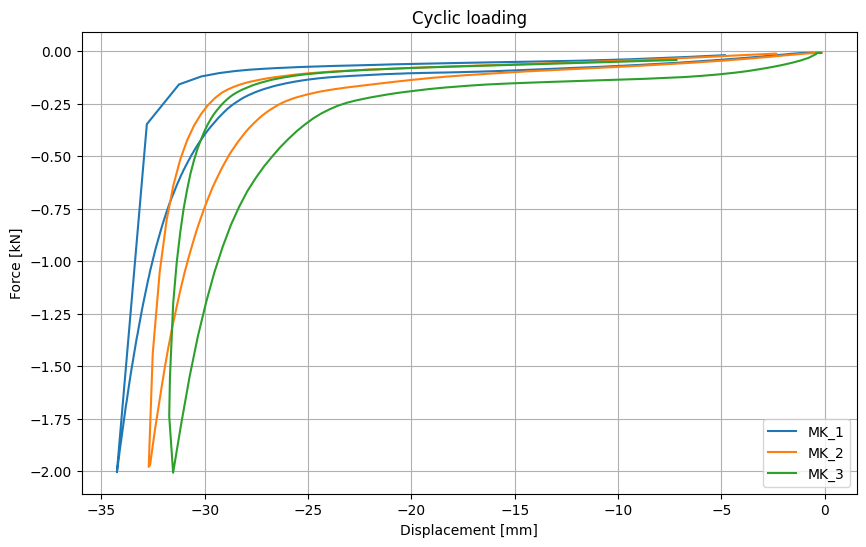

In [108]:
plt.figure(figsize=(10,6))
plt.plot(disp_MK_1_cyc, force_MK_1_cyc, label = 'MK_1')
plt.plot(disp_MK_2_cyc, force_MK_2_cyc, label = 'MK_2')
plt.plot(disp_MK_3_cyc, force_MK_3_cyc, label = 'MK_3')
plt.xlabel('Displacement [mm]')
plt.ylabel('Force [kN]')
plt.title('Cyclic loading')
plt.legend()
plt.grid()
plt.show()

### Octagonal lattice

##### Cyclic loading 

In [109]:
force_O_1_cyc, disp_O_1_cyc = ForceAndDisp_FromExcel('Preliminary_tests_data.xlsx', 'O_1_Cyc')
force_O_2_cyc, disp_O_2_cyc = ForceAndDisp_FromExcel('Preliminary_tests_data.xlsx', 'O_2_Cyc')
force_O_3_cyc, disp_O_3_cyc = ForceAndDisp_FromExcel('Preliminary_tests_data.xlsx', 'O_3_Cyc')

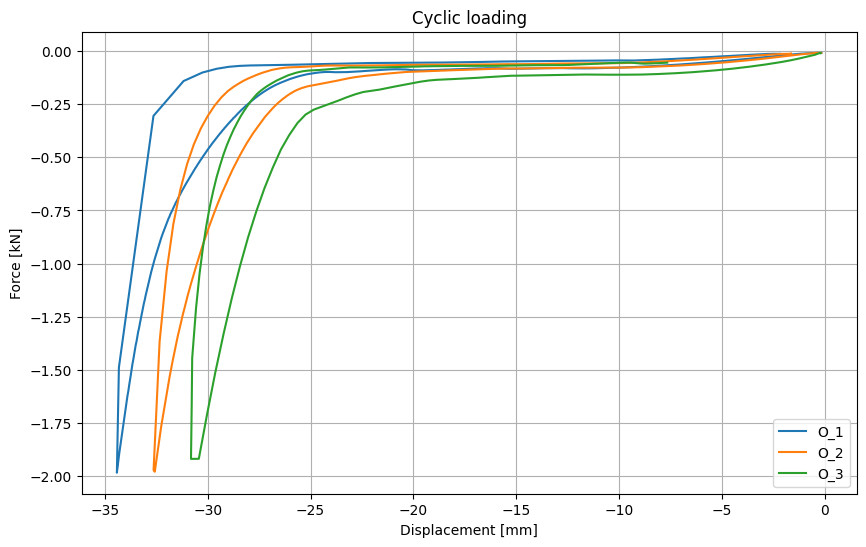

In [110]:
plt.figure(figsize=(10,6))
plt.plot(disp_O_1_cyc, force_O_1_cyc, label = 'O_1')
plt.plot(disp_O_2_cyc, force_O_2_cyc, label = 'O_2')
plt.plot(disp_O_3_cyc, force_O_3_cyc, label = 'O_3')
plt.xlabel('Displacement [mm]')
plt.ylabel('Force [kN]')
plt.title('Cyclic loading')
plt.legend()
plt.grid()
plt.show()

test funker det nå??